## Pendahuluan
### Dataset Salju

Tugas untuk unsupervised learning adalah memprediksi apakah besok akan turun salju atau tidak.<br>

### Deskripsi Data
Temperature --> dalam celcius<br>
Hujan --> dalam mm<br>
SinarMatahari --> jumlah jam munculnya sinar matahari<br>
Cloud3pm --> Rasio langit tertutup awan pukul 3pm<br>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
train_data = pd.read_csv("salju_train.csv")
test_data = pd.read_csv("salju_test.csv")

## Data Exploration & Preprocessing

### Data Info

In [3]:
train_data.info()
print("")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [4]:
train_data.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [5]:
train_data.describe(include="all")

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
count,109095.000000,109095,109095,107973.000000,108166.000000,106664.000000,62071.000000,56716.000000,101351,101399.000000,...,107093.000000,105721.000000,97768.000000,97787.000000,67251.000000,64624.000000,107755.000000,106397.000000,106664,106664
unique,NaN,3414,49,NaN,NaN,NaN,NaN,NaN,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,14/09/2016,C1,NaN,NaN,NaN,NaN,NaN,W,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tidak,Tidak
freq,NaN,45,2598,NaN,NaN,NaN,NaN,NaN,7491,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82670,82701
mean,54548.000000,NaN,NaN,12.196183,23.214819,2.385005,5.462440,7.599527,NaN,40.032002,...,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771,NaN,NaN
std,31493.158146,NaN,NaN,6.389419,7.106596,8.588155,4.201638,3.789042,NaN,13.617554,...,18.995528,20.791573,7.117338,7.047875,2.884566,2.718738,6.477602,6.922833,NaN,NaN
min,1.000000,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,7.000000,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,NaN
25%,27274.500000,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,...,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,NaN
50%,54548.000000,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,...,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,NaN
75%,81821.500000,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,...,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,NaN


In [6]:
test_data.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,...,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,...,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,...,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [7]:
test_data.describe(include="all")

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
count,18182,18182,18017.000000,18017.000000,17795.000000,10326.000000,9464.000000,16901,16908.000000,16874,...,17852.000000,17634.000000,16317.00000,16329.000000,11140.000000,10726.000000,17963.000000,17740.000000,17795,17763
unique,3151,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,15/06/2016,C24,NaN,NaN,NaN,NaN,NaN,SSE,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,14,426,NaN,NaN,NaN,NaN,NaN,1189,NaN,1460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13830,13824
mean,NaN,NaN,12.233158,23.295604,2.333560,5.509646,7.630135,NaN,39.974095,NaN,...,68.791676,51.438811,1017.56166,1015.181064,4.449820,4.498322,17.048945,21.774408,NaN,NaN
std,NaN,NaN,6.433053,7.156981,8.320407,4.159158,3.796355,NaN,13.491682,NaN,...,19.158606,20.799233,7.14728,7.072656,2.890697,2.725233,6.524556,6.978095,NaN,NaN
min,NaN,NaN,-7.600000,-2.500000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,2.000000,1.000000,982.30000,984.500000,0.000000,0.000000,-5.200000,-3.700000,NaN,NaN
25%,NaN,NaN,7.700000,18.000000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,57.000000,36.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.700000,NaN,NaN
50%,NaN,NaN,12.000000,22.700000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.800000,21.200000,NaN,NaN
75%,NaN,NaN,16.900000,28.300000,0.600000,7.400000,10.700000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.30000,1019.900000,7.000000,7.000000,21.600000,26.600000,NaN,NaN


### Preprocessing Data

### Untuk clustering, kolom bersalju besok di drop

In [8]:
train_df = train_data.drop(["id","BersaljuBesok"], axis=1)
test_df = test_data.drop(["BersaljuBesok"], axis=1)
datasets = [train_df, test_df]

### Mengisi missing value pada data numerikal

In [9]:
col = datasets[0].select_dtypes("number").columns
datasets[0].loc[:,col].describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,107973.000000,108166.000000,106664.000000,62071.000000,56716.000000,101399.000000,107742.000000,106792.000000,107093.000000,105721.000000,97768.000000,97787.000000,67251.000000,64624.000000,107755.000000,106397.000000
mean,12.196183,23.214819,2.385005,5.462440,7.599527,40.032002,14.052115,18.677579,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771
std,6.389419,7.106596,8.588155,4.201638,3.789042,13.617554,8.926092,8.830199,18.995528,20.791573,7.117338,7.047875,2.884566,2.718738,6.477602,6.922833
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,47.300000,371.000000,145.000000,14.300000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [10]:
datasets[1].loc[:,col].describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,18017.000000,18017.000000,17795.000000,10326.000000,9464.000000,16908.000000,17984.000000,17828.000000,17852.000000,17634.000000,16317.00000,16329.000000,11140.000000,10726.000000,17963.000000,17740.000000
mean,12.233158,23.295604,2.333560,5.509646,7.630135,39.974095,13.971864,18.585540,68.791676,51.438811,1017.56166,1015.181064,4.449820,4.498322,17.048945,21.774408
std,6.433053,7.156981,8.320407,4.159158,3.796355,13.491682,8.828422,8.748586,19.158606,20.799233,7.14728,7.072656,2.890697,2.725233,6.524556,6.978095
min,-7.600000,-2.500000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,2.000000,1.000000,982.30000,984.500000,0.000000,0.000000,-5.200000,-3.700000
25%,7.700000,18.000000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.700000
50%,12.000000,22.700000,0.000000,4.800000,8.400000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.800000,21.200000
75%,16.900000,28.300000,0.600000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.30000,1019.900000,7.000000,7.000000,21.600000,26.600000
max,31.400000,48.100000,247.200000,68.800000,14.500000,122.000000,83.000000,83.000000,100.000000,100.000000,1040.60000,1038.400000,8.000000,8.000000,37.700000,46.100000


Drop kolom yang memiliki banyak data null

In [11]:
datasets[0].drop(["Penguapan", "SinarMatahari", "Awan9am", "Awan3pm"], axis=1, inplace=True)
datasets[0].shape

(109095, 18)

### # Ekperimen data
Membuat dataset ekperimen dengan pengisian null dengan nilai 0 dan modus

In [12]:
col = datasets[0].select_dtypes("number").columns
df_ex_zero = datasets.copy()
df_ex_mode = datasets.copy()

In [13]:
for df in df_ex_zero:  
    col = df.select_dtypes("number").columns
    for x in col:
        df[x].fillna(0, inplace=True)

In [14]:
for df in df_ex_mode:  
    col = df.select_dtypes("number").columns
    for x in col:
        df[x].fillna(df[x].mode().iloc[0], inplace=True)

In [15]:
df_ex_zero[0].select_dtypes("number").isna().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
KecepatanAnginTerkencang    0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Suhu9am                     0
Suhu3pm                     0
dtype: int64

In [16]:
df_ex_zero[0].select_dtypes("number").isna().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
KecepatanAnginTerkencang    0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Suhu9am                     0
Suhu3pm                     0
dtype: int64

### Menghilangkan outlier pada dataset

In [17]:
# IQR untuk df_ex_zero
i = 0
for df in df_ex_zero:
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_ex_zero[i] = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
    df_ex_zero[i].reset_index(drop=True, inplace=True)
    i += 1

In [18]:
print("shape data train: ",df_ex_zero[0].shape)
print("shape data test: ",df_ex_zero[1].shape)

shape data train:  (70498, 18)
shape data test:  (11509, 22)


In [19]:
# IQR untuk df_ex_mode
i = 0
for df in df_ex_mode:
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_ex_mode[i] = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]
    df_ex_mode[i].reset_index(drop=True, inplace=True)
    i += 1

In [20]:
print("shape data train: ",df_ex_mode[0].shape)
print("shape data test: ",df_ex_mode[1].shape)

shape data train:  (70498, 18)
shape data test:  (11509, 22)


### Normalisasi Data Numerikal
Menggunakan MinMaxScaler

In [21]:
# Normalisiasi data train
def minMaxScaler(dataset):
    col = dataset.select_dtypes("number").columns
    col_idx = []
    
    # Mencari nilai min dan max setiap kolom
    for column in col:
        col_idx.append(dataset.columns.get_loc(column))
    min_val = dataset.iloc[:, col_idx].min()
    max_val = dataset.iloc[:, col_idx].max()
    
    # Melakukan scaling untuk setiap baris
    for row in range(len(dataset)):
        for i in range(len(col_idx)):
            dataset.iloc[row, col_idx[i]] = (dataset.iloc[row, col_idx[i]] - min_val[i]) / (max_val[i] - min_val[i])
    return dataset

Dikarenakan keterbatasan kemampuan komputer, sehingga hanya akan diambil sampel data saja

In [22]:
# scaling data df_ex_zero
df_ex_zero[0] = minMaxScaler(df_ex_zero[0].iloc[:10000])
df_ex_zero[1] = minMaxScaler(df_ex_zero[1].iloc[:4000])

E:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
# scaling data df_ex_mode
df_ex_mode[0] = minMaxScaler(df_ex_mode[0].iloc[:10000])
df_ex_mode[1] = minMaxScaler(df_ex_mode[1].iloc[:4000])

### Mengisi missing value pada data kategorikal

In [24]:
for df in df_ex_zero:    
    col_cat= df.select_dtypes(include="object").columns
    for col in col_cat:
        df[col].fillna(df[col].mode().iloc[0], inplace=True)

In [25]:
for df in df_ex_mode:    
    col_cat= df.select_dtypes(include="object").columns
    for col in col_cat:
        df[col].fillna(df[col].mode().iloc[0], inplace=True)

In [26]:
df_ex_zero[0].select_dtypes("object").isna().sum()

Tanggal                0
KodeLokasi             0
ArahAnginTerkencang    0
ArahAngin9am           0
ArahAngin3pm           0
BersaljuHariIni        0
dtype: int64

In [27]:
df_ex_mode[0].select_dtypes("object").isna().sum()

Tanggal                0
KodeLokasi             0
ArahAnginTerkencang    0
ArahAngin9am           0
ArahAngin3pm           0
BersaljuHariIni        0
dtype: int64

### Encode data kategorikal

In [28]:
# Encode df_ex_zero
i = 0
for df in df_ex_zero:
    # drop kolom tanggal dan kode lokasi karena terlalu banyak nilai uniknya
    df.drop(["Tanggal","KodeLokasi"], axis=1, inplace=True)
    
    # encode untuk nilai "Ya" dan "Tidak" pada df_ex_zero
    df.replace({"Ya": 1, "Tidak": 0}, inplace=True)
    
    # menerapkan OHE dengan memanggil get_dummies untuk setiap data kategorikal yang ada
    col_cat = df.select_dtypes(include="object").columns
    df_ex_zero[i] = pd.get_dummies(df, columns=col_cat)
    i += 1

In [29]:
# Encode df_ex_mode
i = 0
for df in df_ex_mode:
    # drop kolom tanggal dan kode lokasi karena terlalu banyak nilai uniknya
    df.drop(["Tanggal","KodeLokasi"], axis=1, inplace=True)
    
    # encode untuk nilai "Ya" dan "Tidak" pada df_ex_mode
    df.replace({"Ya": 1, "Tidak": 0}, inplace=True)
    
    # menerapkan OHE dengan memanggil get_dummies untuk setiap data kategorikal yang ada
    col_cat = df.select_dtypes(include="object").columns
    df_ex_mode[i] = pd.get_dummies(df, columns=col_cat)
    i += 1

In [30]:
df_ex_zero[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SuhuMin                   10000 non-null  float64
 1   SuhuMax                   10000 non-null  float64
 2   Hujan                     10000 non-null  float64
 3   KecepatanAnginTerkencang  10000 non-null  float64
 4   KecepatanAngin9am         10000 non-null  float64
 5   KecepatanAngin3pm         10000 non-null  float64
 6   Kelembaban9am             10000 non-null  float64
 7   Kelembaban3pm             10000 non-null  float64
 8   Tekanan9am                10000 non-null  float64
 9   Tekanan3pm                10000 non-null  float64
 10  Suhu9am                   10000 non-null  float64
 11  Suhu3pm                   10000 non-null  float64
 12  BersaljuHariIni           10000 non-null  int64  
 13  ArahAnginTerkencang_E     10000 non-null  uint8  
 14  ArahAng

In [31]:
df_ex_mode[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SuhuMin                   10000 non-null  float64
 1   SuhuMax                   10000 non-null  float64
 2   Hujan                     10000 non-null  float64
 3   KecepatanAnginTerkencang  10000 non-null  float64
 4   KecepatanAngin9am         10000 non-null  float64
 5   KecepatanAngin3pm         10000 non-null  float64
 6   Kelembaban9am             10000 non-null  float64
 7   Kelembaban3pm             10000 non-null  float64
 8   Tekanan9am                10000 non-null  float64
 9   Tekanan3pm                10000 non-null  float64
 10  Suhu9am                   10000 non-null  float64
 11  Suhu3pm                   10000 non-null  float64
 12  BersaljuHariIni           10000 non-null  int64  
 13  ArahAnginTerkencang_E     10000 non-null  uint8  
 14  ArahAng

### Export dataset 

In [32]:
df_ex_zero[0].to_csv('salju_train_preprocess_zero.csv', encoding='utf-8', index=False)
df_ex_zero[1].to_csv('salju_test_preprocess_zero.csv', encoding='utf-8', index=False)

In [33]:
df_ex_mode[0].to_csv('salju_train_preprocess_mode.csv', encoding='utf-8', index=False)
df_ex_mode[1].to_csv('salju_test_preprocess_mode.csv', encoding='utf-8', index=False)

### Mencari feature untuk model
Karena dimensi data sangat besar, maka dilakukan pemilihan feature yang akan digunakan ke dalam K-means, sehingga feature "Tekanan3pm" dan "SuhuMin" yang dipilih untuk diuji

In [35]:
X_zero = df_ex_zero[0].loc[:, ["Tekanan3pm", "SuhuMin"]]
X_zero

,Tekanan3pm,SuhuMin
0,0.560185,0.367978
1,0.509259,0.328652
2,0.458333,0.567416
3,0.372685,0.379213
4,0.479167,0.679775
...,...,...
9995,0.546296,0.679775
9996,0.733796,0.320225
9997,0.856481,0.418539
9998,0.643519,0.617978


In [36]:
X_mode = df_ex_mode[0].loc[:, ["Tekanan3pm", "SuhuMin"]]
X_mode

,Tekanan3pm,SuhuMin
0,0.560185,0.367978
1,0.509259,0.328652
2,0.458333,0.567416
3,0.372685,0.379213
4,0.479167,0.679775
...,...,...
9995,0.546296,0.679775
9996,0.733796,0.320225
9997,0.856481,0.418539
9998,0.643519,0.617978


## Pembuatan Model

### Pembuatan fungsi Euclidean Distance

In [37]:
def euclideanDist(x1, x2):
    temp = 0
    for i in range(len(x1)):
        temp += np.square(x1[i] - x2[i])
        result = np.sqrt(temp)
    return result

In [38]:
def predDist(data_class, centroid):
    temp = 0
    for i in range(len(data_class)):
        for j in range(len(centroid)):
            temp += np.square(data_class[i] - centroid[j])
    result = np.sqrt(temp)
    return result

### Pembuatan fungsi K-Means

In [39]:
class kMeans:
    def __init__(self, k, tres, n_iter):
        self.k = k
        self.treshold = tres
        self.n_iter = n_iter
    
    def fit(self, x):
        # Inisiasi centroid awal
        self.centroids = {}
        for a in range(self.k):
            self.centroids[a] = x.iloc[a]

        # Melakukan klasifikasi data sesuai dengan centroidnya
        for i in range(self.n_iter):

            # Mendefinisikan kelas data
            self.data_class = {}

            for b in range(self.k):
                self.data_class[b] = []

            # Menghitung jarak dan melakukan klasifikasi
            for n in range(len(x)):
                dist = []
                for j in self.centroids:
                    res = euclideanDist(x.iloc[n], self.centroids[j])
                    dist.append(res)

                min_dist_idx = dist.index(min(dist))
                self.data_class[min_dist_idx].append(x.iloc[n])

            # Inisiasi centroid lama
            old_centroids = dict(self.centroids)

            # Menentukan centroid baru dengan menghitung rata-rata point pada setiap kluster
            for key in self.data_class:
                c_data = self.data_class[key]
                new_centro = np.average(c_data, axis = 0)
                self.centroids[key] = new_centro


            # Cek kondisi centroid apakah ganti atau tidak
            isOptimal = True

            for c in self.centroids:
                old_centroid = old_centroids[c]
                curr_centroid = self.centroids[c]
                if np.sum( (curr_centroid - old_centroid) / old_centroid * 100.0) > self.treshold:
                    isOptimal = False
            if isOptimal:
                break

    def predict(self, x):
        data_class = {}
        for b in range(self.k):
            data_class[b] = []
        for n in range(len(x)):
            dist = []
            for j in self.centroids:
                res = predDist(x.iloc[n], self.centroids[j])
                dist.append(res)

            min_dist_idx = dist.index(min(dist))
            data_class[min_dist_idx].append(x.iloc[n])
        return data_class

## Evaluasi Model

### Pembuatan fungsi hitung Silhoutte Coefficient

In [40]:
def silhouetteCoef(data_class):
    intra_res = []
    inter_res = []
    for idx in range(len(data_class)):
        init_point = data_class[idx][0]
        inter_dist = 0
        intra_dist = 0
        
        # Menghitung intra-cluster distance 
        for point in range(1, len(data_class[idx])):
            intra_dist += euclideanDist(init_point, data_class[idx][point])
        intra_res.append(intra_dist / len(data_class[idx]))     
        
        # Menghitung inter-cluster distance
        next_idx = idx + 1
        while next_idx < len(data_class):
            for point in range(len(data_class[next_idx])):
                inter_dist += euclideanDist(init_point, data_class[next_idx][point])
            inter_res.append(inter_dist / len(data_class[next_idx]))
            next_idx += 1

    inter_res = np.mean(inter_res)
    intra_res = np.mean(intra_res)
    return (inter_res - intra_res) / max(intra_res, inter_res)

## Eksperimen

### Perbandingan performa K-means untuk setiap dataset eksperimen

In [43]:
# K-means dengan dataset X_zero
k = []
sil = []
for i in range(2,8):
    k.append(i)
    model = kMeans(i, 0.001, 50)
    model.fit(X_zero)
    sil_res = silhouetteCoef(model.data_class)
    sil.append(1- sil_res)

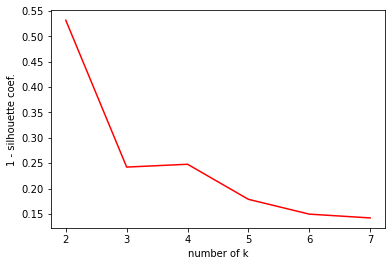

In [44]:
plt.plot(k, sil, linestyle='solid', c='r')
plt.ylabel("1 - silhouette coef.")
plt.xlabel("number of k")
plt.show()

In [63]:
# K-means dengan dataset X_mode
k = []
sil = []
for i in range(2,7):
    k.append(i)
    model = kMeans(i, 0.001, 50)
    model.fit(X_mode)
    sil_res = silhouetteCoef(model.data_class)
    sil.append(1- sil_res)

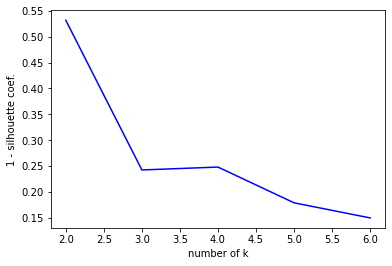

In [64]:
plt.plot(k, sil, linestyle='solid', c='b')
plt.ylabel("1 - silhouette coef.")
plt.xlabel("number of k")
plt.show()

Hasil silhouette coef sama, hal ini mengindikasikan bahwa 10000 data pertama tidak mempengaruhi K-means

### Eksperimen dengan mengganti parameter k

In [70]:
# Silhouette Coef k: 3 pada model sebelumnya
print("prev = k: ",k[1], "-> Silhouette Coef: ",1 - sil[1])

prev = k:  3 -> Silhouette Coef:  0.7576764491498857


In [71]:
# Ujicoba k: 3 dengan parameter baru
model_new = kMeans(3, 0.0001, 50)
model_new.fit(X_mode)
print("k: ",3," -> Silhouette Coef: ",silhouetteCoef(model.data_class))

k:  3  -> Silhouette Coef:  0.8504003172100483


Hasil silhouette menunjukkan bahwa model K-means dengan parameter k=3, treshold=0.001, dan iterasi=50 memiliki Silhouette coef lebih kecil daripada K-means dengan treshold=0.0001, dan iterasi=50

### Visualisasi data training
Menggunakan model k-means dengan parameter k=3 , treshold=0.0001, dan iterasi=50

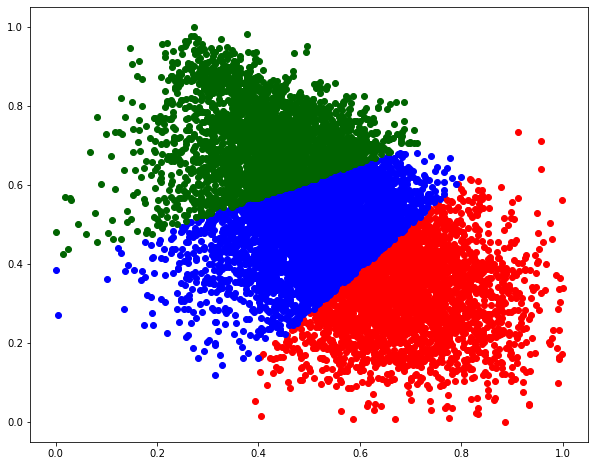

In [87]:
cmap = {0 : 'r',1 : 'b', 2: 'darkgreen', 3: 'm', 4: 'y', 5: 'darkorange', 6: 'c', 7: 'darkviolet'}

label_color = [cmap[l] for l in model.data_class]
plt.figure(figsize=(10,8))

for centroid in model_new.centroids:
    plt.scatter(model_new.centroids[centroid][0], model_new.centroids[centroid][1], marker="*", color='k', s=150, linewidths=5)
    
for idx_class in model_new.data_class:
    for idx_data in range(len(model_new.data_class[idx_class])):
        plt.scatter(model_new.data_class[idx_class][idx_data][0], model_new.data_class[idx_class][idx_data][1] , c=label_color[idx_class])
plt.show()

### Prediksi data test

In [88]:
# Prediksi data test df_ex_zero
pred = model_new.predict(df_ex_zero[1])

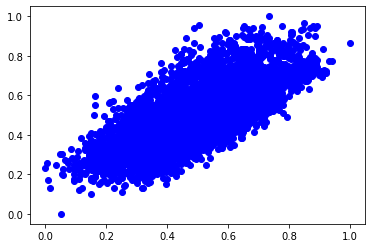

In [90]:
for idx_class in pred:
    for idx_data in range(len(pred[idx_class])):
        plt.scatter(pred[idx_class][idx_data][0], pred[idx_class][idx_data][1] , c=label_color[idx_class])
plt.show()

Seluruh data test tergabung ke dalam cluster biru

## Kesimpulan
Parameter terbaik pada model K-means ini untuk dataset salju dengan jumlah data 10.000 data adalah k=3 , treshold=0.0001, dan iterasi=50. Unutuk memprediksi besok bersalju atau tidak, dapat dilakukan dengan cara menentukan untuk setiap kelompok data apakah kemumngkinan kelompok data tersebut menunjukkan terjadinya salju atau tidak.